In [1]:
] activate ../ 

In [2]:
using Revise
using POMDPs
using GridInterpolations 
using POMDPModelTools
using POMDPPolicies
using Parameters
using StaticArrays
using DiscreteValueIteration 
using Distributed
using AutomotiveDrivingModels
using AutoViz
using AutomotiveSensors
using AutomotivePOMDPs
using PedestrianAvoidancePOMDP

using FileIO
using JLD2

┌ Info: Recompiling stale cache file /home/xubuntu/.julia/compiled/v1.0/PedestrianAvoidancePOMDP/UuJ2S.ji for PedestrianAvoidancePOMDP [a80ff0fe-e6a0-11e8-3b05-15413bd5ea7a]
└ @ Base loading.jl:1187


In [50]:
pomdp = SingleOCFPOMDP()
pomdp.COLLISION_COST = -600.0
pomdp.ACTION_LON_COST = -5.0
pomdp.ACTION_LAT_COST = 0.0
pomdp.KEEP_VELOCITY_REWARD = 50.0
pomdp.KEEP_LANE_REWARD = 0.0
pomdp.PROBABILITY_PEDESTRIAN_BIRTH = 0.5
#pomdp.lateral_actions = [1.0, 0.0, -1.0]
pomdp.γ = 0.95

solver = SparseValueIterationSolver(max_iterations=200, belres=1e-4, include_Q=true, verbose=true)
mdp = UnderlyingMDP(pomdp);


In [51]:
vi_policy = solve(solver, mdp)

qmdp_policy = AlphaVectorPolicy(pomdp, vi_policy.qmat, vi_policy.action_map)

# save policy!
FileIO.save("policy.jld2", "policy", qmdp_policy)


┌ Info: residual: 600.0000000000001, time: 0.068540699, total time: 0.068540699 
│   i = 1
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 570.0000000000001, time: 0.06503803, total time: 0.133578729 
│   i = 2
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 541.5000000000003, time: 0.066711336, total time: 0.20029006500000002 
│   i = 3
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 514.425, time: 0.087733951, total time: 0.28802401600000005 
│   i = 4
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 488.70374999999984, time: 0.103611589, total time: 0.39163560500000005 
│   i = 5
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: res

┌ Info: residual: 5.799111065000602, time: 0.066854092, total time: 3.895355093 
│   i = 43
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 5.509155511750578, time: 0.086349146, total time: 3.981704239 
│   i = 44
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 5.233697736163094, time: 0.070104698, total time: 4.051808937 
│   i = 45
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 4.972012849354883, time: 0.077285139, total time: 4.1290940759999994 
│   i = 46
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 4.723412206887133, time: 0.077449829, total time: 4.206543904999999 
│   i = 47
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info:

┌ Info: residual: 0.6725937828846327, time: 0.078155719, total time: 7.3332200859999945 
│   i = 85
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.6389640937403556, time: 0.09272808, total time: 7.425948165999994 
│   i = 86
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.6070158890534003, time: 0.261536677, total time: 7.687484842999994 
│   i = 87
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.5766650946006848, time: 0.079092438, total time: 7.766577280999994 
│   i = 88
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.5478318398706961, time: 0.069119154, total time: 7.835696434999994 
│   i = 89
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src

┌ Info: residual: 0.07800892097191081, time: 0.077297632, total time: 10.864644262999994 
│   i = 127
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.07410847492326411, time: 0.071896014, total time: 10.936540276999994 
│   i = 128
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.07040305117720891, time: 0.079777955, total time: 11.016318231999994 
│   i = 129
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.06688289861835983, time: 0.069119231, total time: 11.085437462999995 
│   i = 130
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.06353875368745321, time: 0.079652374, total time: 11.165089836999995 
│   i = 131
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIter

┌ Info: residual: 0.010025094665707002, time: 0.077620572, total time: 14.473797349999995 
│   i = 167
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.009523839932398914, time: 0.300694358, total time: 14.774491707999994 
│   i = 168
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.00904764793585855, time: 0.094549038, total time: 14.869040745999994 
│   i = 169
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.008595265539156571, time: 0.076809148, total time: 14.945849893999995 
│   i = 170
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.008165502262158952, time: 0.067075145, total time: 15.012925038999995 
│   i = 171
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValue

In [123]:
pomdp = SingleOCFPOMDP()

qmdp_policy = load("policy.jld2")["policy"];

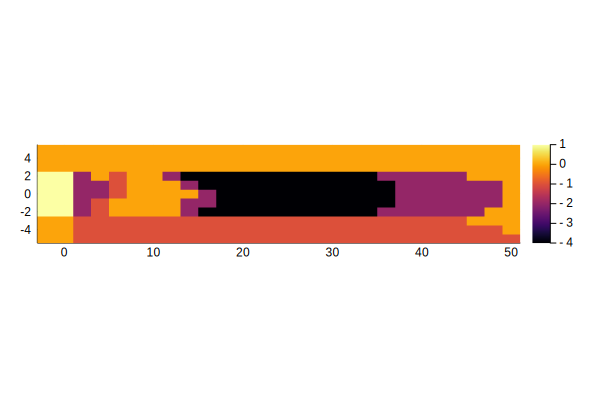

In [66]:
using Interact
using Plots
gr()

policy_grid = zeros(Float64, length(pomdp.T_RANGE), length(pomdp.S_RANGE))


#@manipulate for ego_v in pomdp.EGO_V_RANGE
    ego_v = 14.0
    #@manipulate for ped_v in pomdp.PED_V_RANGE
    ped_v = 0.0
        for i=1:length(pomdp.T_RANGE)
            ped_t = pomdp.T_RANGE[i]
            for j=1:length(pomdp.S_RANGE)
                ped_s = pomdp.S_RANGE[j]
       # 0.0, 15.0, 50.0, 5.0, 1.57, 0.0
                b = SparseCat([SingleOCFState(0.0, ego_v, ped_s, ped_t, 1.57, ped_v)],[1.])
                act = action(qmdp_policy, b) 
               # println(ped_s, "/", ped_t, " act: ", act.acc)
                policy_grid[i,j] = act.acc
            end
        end
        xs = [pomdp.S_RANGE[i] for i = 1:length(pomdp.S_RANGE)]
        ys = [pomdp.T_RANGE[i] for i = 1:length(pomdp.T_RANGE)]
        heatmap(xs,ys,policy_grid,aspect_ratio=1)
#    end
#end




In [59]:
b = SparseCat([SingleOCFState(0.0, 15., 50., pomdp.T_MIN, 0., 0.)],[1.])
act = action(qmdp_policy, b) 
println(act)
PedestrianAvoidancePOMDP.action_values(qmdp_policy, b)

[-2.0, 0.0]


5-element Array{Float64,1}:
 26.655869969404577
 26.662765871678374
 26.676764301373737
 26.804288860434372
 20.576146813044776

In [ ]:
using Interact
using Plots
gr()

policy_grid = zeros(Float64, length(pomdp.T_RANGE), length(pomdp.S_RANGE))

@manipulate for ego_v in pomdp.EGO_V_RANGE
    @manipulate for ped_v in pomdp.PED_V_RANGE

        for i=1:length(pomdp.T_RANGE)
            ped_t = pomdp.T_RANGE[i]
            for j=1:length(pomdp.S_RANGE)
                ped_s = pomdp.S_RANGE[j]
                b = SparseCat([SingleOCFState(0.0, ego_v, ped_s, ped_t, 1.57, ped_v)],[1.])
                act = action(qmdp_policy, b) 
              #  println(ped_s, "/", ped_t, " act: ", act.acc)
                policy_grid[i,j] = act.lateral_movement
            end
        end

        xs = [pomdp.S_RANGE[i] for i = 1:length(pomdp.S_RANGE)]
        ys = [pomdp.T_RANGE[i] for i = 1:length(pomdp.T_RANGE)]
        heatmap(xs,ys,policy_grid,aspect_ratio=1)
    end
end


In [ ]:
# Test action space


cnt = 0
for (index, a) in enumerate(pomdp.action_space)
    idx = actionindex(pomdp,a)
    if (idx != index)
        println("error")
        cnt = cnt + 1
    end
    println(a)
end
println(cnt)


In [ ]:
b = SingleOCFBelief([SingleOCFState(0.0, 5.0, 50.0, 3.0, 1.57, 0.0)], [1.0])
act = action(qmdp_policy, b) # policy
println(act)
PedestrianAvoidancePOMDP.action_values(qmdp_policy,b)
vi_policy.util[18223]

In [78]:
using PedestrianAvoidancePOMDP

pomdp = SingleOCFPOMDP()

s = SingleOCFState(0.0, 14, 50.0, -3.0, 1.57, 0.0)
sp = SingleOCFState(0.0, 14., 50.0, -3.0, 1.57, 0.0)
act = SingleOCFAction(0.0, 0.0)
print("reward: ", reward(pomdp, s, act, sp))

b = SparseCat([sp],[1.])
act = action(qmdp_policy, b) 


reward: 5.0

2-element SingleOCFAction:
 0.0
 0.0

In [ ]:

b = SparseCat([SingleOCFState(0.0, 11.0, 50.0, 5.0, 0., 0.)],[1.])
act = action(qmdp_policy, b) 
act.acc

In [ ]:
SparseValueIterationSolver

In [22]:
length(pomdp.lateral_actions)

1

ErrorException: syntax: type declarations on global variables are not yet supported